# Support Vector Machines - Exercise 1

In this exercise, we'll be using support vector machines (SVMs) to build a spam classifier.  We'll start with SVMs on some simple 2D data sets to see how they work.  Then we'll do some pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of C (similar to the regularization term in linear/logistic regression).  Let's load the data.
## Exercise 1
#### 1. Load libraries

In [1]:
import pandas as pd

# numpy: Para cálculos numéricos y operaciones con arrays
import numpy as np

# matplotlib: Librería base para visualización de gráficos
import matplotlib.pyplot as plt

# seaborn: Librería de visualización avanzada, basada en matplotlib
import seaborn as sns

#### 2. Load data
Load the file *ejer_1_data1.mat*. Find the way for loading this kind of file. **scipy.io.loadmat**

In [2]:
import scipy.io as sio
mat = sio.loadmat('data/ejer_1_data1.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

In [3]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [4]:
mat['y']

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]], dtype=uint8)

In [5]:
mat['X']

array([[1.9643  , 4.5957  ],
       [2.2753  , 3.8589  ],
       [2.9781  , 4.5651  ],
       [2.932   , 3.5519  ],
       [3.5772  , 2.856   ],
       [4.015   , 3.1937  ],
       [3.3814  , 3.4291  ],
       [3.9113  , 4.1761  ],
       [2.7822  , 4.0431  ],
       [2.5518  , 4.6162  ],
       [3.3698  , 3.9101  ],
       [3.1048  , 3.0709  ],
       [1.9182  , 4.0534  ],
       [2.2638  , 4.3706  ],
       [2.6555  , 3.5008  ],
       [3.1855  , 4.2888  ],
       [3.6579  , 3.8692  ],
       [3.9113  , 3.4291  ],
       [3.6002  , 3.1221  ],
       [3.0357  , 3.3165  ],
       [1.5841  , 3.3575  ],
       [2.0103  , 3.2039  ],
       [1.9527  , 2.7843  ],
       [2.2753  , 2.7127  ],
       [2.3099  , 2.9584  ],
       [2.8283  , 2.6309  ],
       [3.0473  , 2.2931  ],
       [2.4827  , 2.0373  ],
       [2.5057  , 2.3853  ],
       [1.8721  , 2.0577  ],
       [2.0103  , 2.3546  ],
       [1.2269  , 2.3239  ],
       [1.8951  , 2.9174  ],
       [1.561   , 3.0709  ],
       [1.5495

#### 3. Create a DataFrame with the features and target

In [6]:
df = pd.DataFrame(mat['X'], columns=['x1','x2'])

In [7]:
df['y'] = mat['y']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      51 non-null     float64
 1   x2      51 non-null     float64
 2   y       51 non-null     uint8  
dtypes: float64(2), uint8(1)
memory usage: 999.0 bytes


In [11]:
df.describe()

,x1,x2,y
count,51.000000,51.000000,51.000000
mean,2.268780,3.132512,0.411765
std,0.928531,0.753256,0.497050
min,0.086405,1.617700,0.000000
25%,1.572550,2.636000,0.000000
50%,2.275300,3.070900,0.000000
75%,2.955050,3.531400,1.000000
max,4.015000,4.616200,1.000000


In [12]:
df['y'].value_counts(normalize=True)

y
0    0.588235
1    0.411765
Name: proportion, dtype: float64

#### 4. Plot a scatterplot with the data

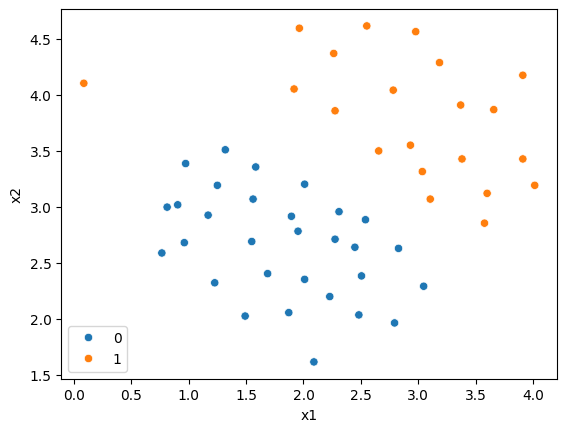

In [14]:
sns.scatterplot(df, x='x1', y='x2', hue="y") 
plt.legend(loc='lower left')

Notice that there is one outlier positive example that sits apart from the others.  The classes are still linearly separable but it's a very tight fit.  We're going to train a linear support vector machine to learn the class boundary.

#### 5. LinearSVC
Declare a Linear SVC with the hyperparamenters:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [15]:
# Importamos LinearSVC de scikit-learn
from sklearn.svm import LinearSVC

In [16]:
svc_1 = LinearSVC(C=1, loss='hinge', max_iter=10000)
# C=1: Parámetro de regularización (valor bajo = más regularización)
# loss='hinge': Función de pérdida estándar para SVM
# max_iter=10000: Número máximo de iteraciones para la convergencia

#### 6. Try the performance (score)
For the first experiment we'll use C=1 and see how it performs.

In [17]:
X = df[['x1', 'x2']]
y = df['y']
svc_1.fit(X, y)
svc_1.score(X, y)

0.9803921568627451

It appears that it mis-classified the outlier.

#### 7. Increase the value of C until you get a perfect classifier

In [18]:
svc_2 = LinearSVC(C=1000, loss='hinge', max_iter=1000000)
X = df[['x1', 'x2']]
y = df['y']
svc_2.fit(X, y)
svc_2.score(X, y)

1.0

This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

#### 8. Plot Decission Function
Get the `decision_function()` output for the first model. Plot a scatterplot with X1, X2 and a range of colors based on `decision_function()`

In [19]:
conf_level = svc_1.decision_function(X)
conf_level

array([ 0.80284449,  0.38392683,  1.37750762,  0.52118752,  0.33342838,
        0.86872664,  0.68654384,  1.61123222,  0.83449913,  1.16714737,
        1.0732599 ,  0.22982744,  0.33183798,  0.7958223 ,  0.31581464,
        1.27411039,  1.2102157 ,  1.        ,  0.56476989,  0.38991417,
       -0.43521466, -0.30878411, -0.68619412, -0.5539505 , -0.33243943,
       -0.2937626 , -0.44062031, -0.98391102, -0.68555489, -1.32841204,
       -1.00372323, -1.49225461, -0.61135775, -0.68338944, -0.99998131,
       -1.1526818 , -1.57835334, -1.35593805, -1.03235012, -1.18500181,
       -0.77136953, -0.76687685, -0.46645287, -0.99991858, -0.51026017,
       -0.85855192, -1.55895399, -0.25481747, -1.11360604, -1.54715159,
       -0.70992644])

<Axes: xlabel='x1', ylabel='x2'>

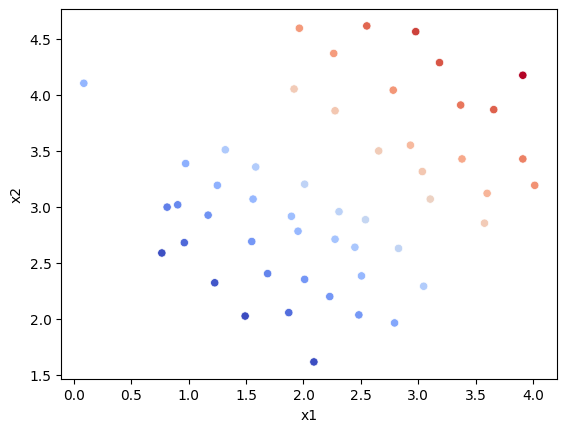

In [20]:
sns.scatterplot(df, x='x1', y='x2', c=conf_level, cmap="coolwarm")

#### 9. Do the same with the second model

https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/

In [21]:
conf_level = svc_2.decision_function(X)
conf_level

array([ 12.00369239,   6.08408971,  15.14525812,   5.40157332,
         1.00007082,   5.67734258,   5.76050586,  14.62258827,
         9.54269213,  14.1860262 ,  10.27283156,   1.4348163 ,
         6.71601874,  10.88726041,   3.98223415,  13.23262794,
        10.86085659,   7.55391056,   3.59595151,   3.52500534,
        -0.99984727,  -1.01088614,  -5.17640063,  -4.76211964,
        -2.32001986,  -3.66458815,  -6.11991846, -10.4513352 ,
        -7.08045491, -12.32482248,  -9.04760365, -11.98946564,
        -4.11185064,  -3.79005287,  -7.41157261,  -9.65553266,
       -13.90113964,  -9.49738634,  -6.47174332,  -7.00278684,
        -2.77681445,  -3.68058154,  -0.44513228,  -9.760233  ,
        -4.85448648, -10.07692133, -15.74758476,  -2.21872877,
        -6.49581047, -11.03174489,   1.        ])

<Axes: xlabel='x1', ylabel='x2'>

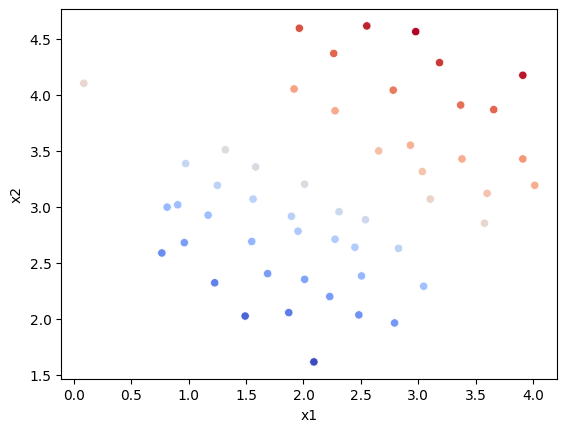

In [22]:
sns.scatterplot(df, x='x1', y='x2', c=conf_level, cmap="coolwarm")

y = ax1 + bx2 + c

0 = ax1 + bx2 + c

x2 = -ax1/b - c/b

In [23]:
svc_2.coef_

array([[3.38442102, 9.46275463]])

In [24]:
svc_2.intercept_

array([-38.13230727])

In [25]:
a = svc_2.coef_[0][0]  # Coeficiente de x1
b = svc_2.coef_[0][1]  # Coeficiente de x2
c = svc_2.intercept_   # Término independiente

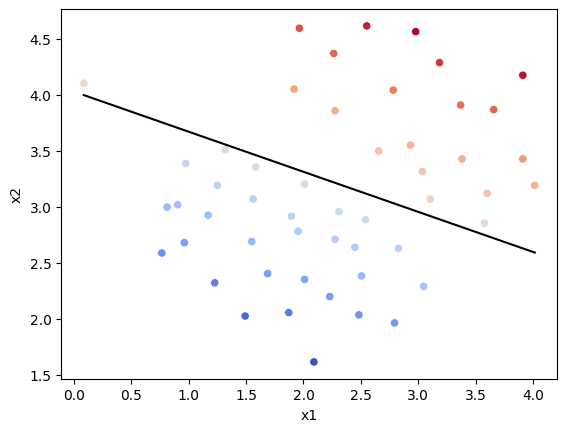

In [27]:
x_points = df['x1'].sort_values()
y_points = -a/b * x_points - c/b
sns.scatterplot(df, x='x1', y='x2', c=conf_level, cmap="coolwarm")
plt.plot(x_points, y_points, color="black")

In [28]:
# Hacemos lo mismo para el primer modelo (C=1)
# Extraemos los coeficientes del primer modelo
a = svc_1.coef_[0][0]
b = svc_1.coef_[0][1]
c = svc_1.intercept_

# Calculamos los puntos de la línea de decisión
x_points = df['x1'].sort_values()
y_points = -a/b * x_points - c/b

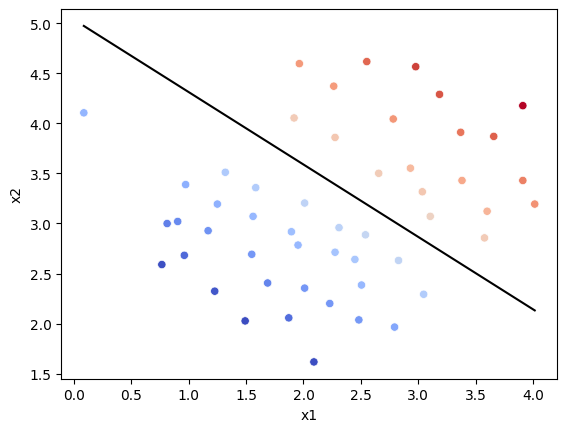

In [29]:
conf_level = svc_1.decision_function(X)
sns.scatterplot(df, x='x1', y='x2', c=conf_level, cmap="coolwarm")
plt.plot(x_points, y_points, color="black")

Now we're going to move from a linear SVM to one that's capable of non-linear classification using kernels.  We're first tasked with implementing a gaussian kernel function.  Although scikit-learn has a gaussian kernel built in, for transparency we'll implement one from scratch.

## Exercise 2

That result matches the expected value from the exercise.  Next we're going to examine another data set, this time with a non-linear decision boundary.

#### 1. Load the data `ejer_1_data2.mat`

In [30]:
mat = sio.loadmat('data/ejer_1_data2.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

#### 2. Create a DataFrame with the features and target

In [ ]:
df = pd.DataFrame(mat['X'], columns=['x1','x2'])
df['y'] = mat['y']


In [34]:
df.head()

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      863 non-null    float64
 1   x2      863 non-null    float64
 2   y       863 non-null    uint8  
dtypes: float64(2), uint8(1)
memory usage: 14.5 KB


In [37]:
df.describe()

,x1,x2,y
count,863.000000,863.000000,863.000000
mean,0.503414,0.694304,0.556199
std,0.254967,0.158884,0.497120
min,0.044931,0.402632,0.000000
25%,0.292627,0.557018,0.000000
50%,0.512673,0.693713,1.000000
75%,0.699309,0.830409,1.000000
max,0.998848,0.988596,1.000000


#### 3. Plot a scatterplot with the data

<Axes: xlabel='x1', ylabel='x2'>

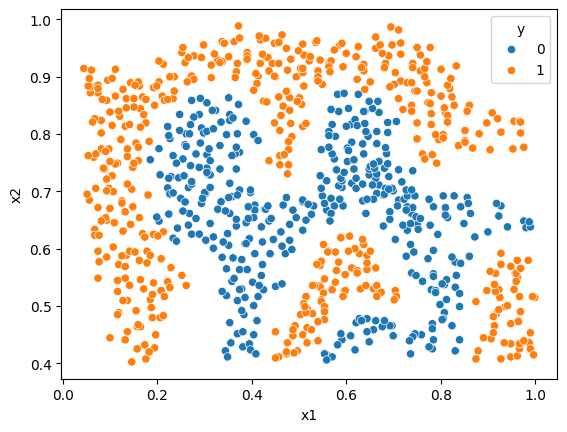

In [38]:
sns.scatterplot(df, x='x1', y='x2', hue="y")

For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.  To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right.

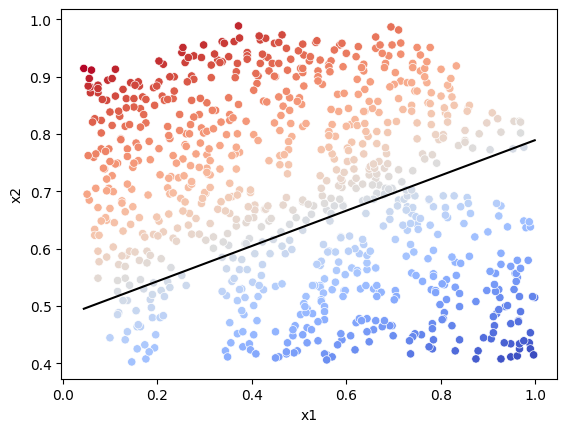

In [39]:
svc_3 = LinearSVC(C=1, loss="hinge", max_iter=10000) 
X = df[['x1','x2']]
y = df['y']
svc_3.fit(X, y)
svc_3.score(X, y)
a = svc_3.coef_[0][0]
b = svc_3.coef_[0][1]
c = svc_3.intercept_
x_points = df['x1'].sort_values()
y_points = -a/b * x_points - c/b
conf_level = svc_3.decision_function(X)
sns.scatterplot(df, x='x1', y='x2', c=conf_level, cmap="coolwarm")
plt.plot(x_points, y_points, color="black")

#### 4. Declare a SVC with this hyperparameters
```Python
SVC(C=100, gamma=10, probability=True)
```


In [40]:
from sklearn.svm import SVC 

In [41]:
svc_4 = SVC(C=100, gamma=10, probability=True)

#### 5. Fit the classifier and get the score

In [42]:
svc_4.fit(X, y)
svc_4.score(X, y)

0.9698725376593279

#### 6. Plot the scatter plot and probability of predicting 0 with a [sequential color](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

In [43]:
y_pred_proba = svc_4.predict_proba(X)
y_pred_proba

array([[3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00],
       ...,
       [3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00]], shape=(863, 2))

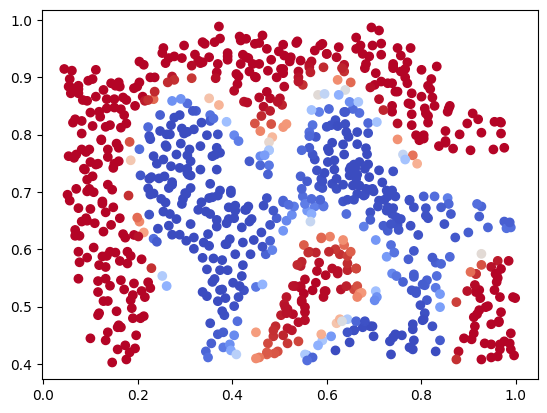

In [44]:
plt.scatter(df['x1'], df['x2'], c=y_pred_proba[:,1], cmap="coolwarm")

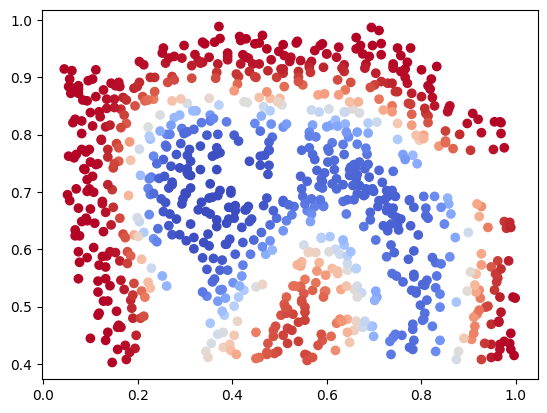

In [45]:
svc_5 = SVC(C=1, gamma=10, probability=True)
svc_5.fit(X, y)
svc_5.score(X, y) 
y_pred_proba = svc_5.predict_proba(X)
plt.scatter(df['x1'], df['x2'], c=y_pred_proba[:,1], cmap="coolwarm")

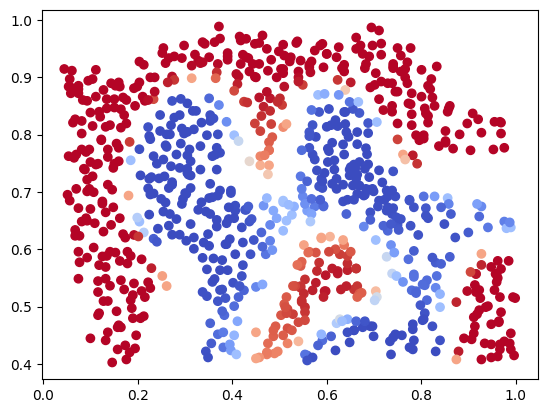

In [46]:
svc_6 = SVC(C=10000, gamma=10, probability=True)
svc_6.fit(X, y)
svc_6.score(X, y)
y_pred_proba = svc_6.predict_proba(X)
plt.scatter(df['x1'], df['x2'], c=y_pred_proba[:,1], cmap="coolwarm")

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: xlabel='x1', ylabel='x2'>

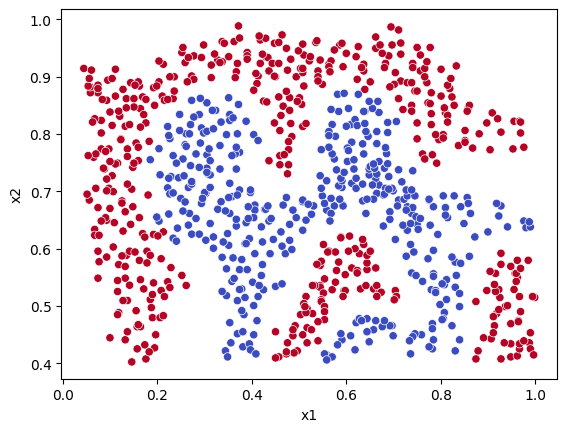

In [49]:
sns.scatterplot(df, x='x1', y='x2', c=df['y'], cmap="coolwarm")

<Axes: xlabel='x1', ylabel='x2'>

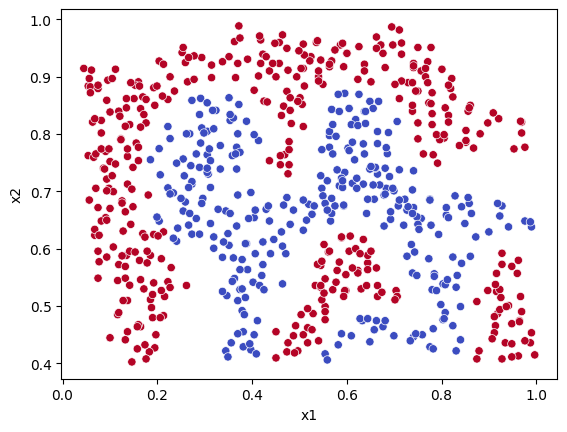

In [50]:
sns.scatterplot(X_train, x='x1', y='x2', c=y_train, cmap="coolwarm")

<Axes: xlabel='x1', ylabel='x2'>

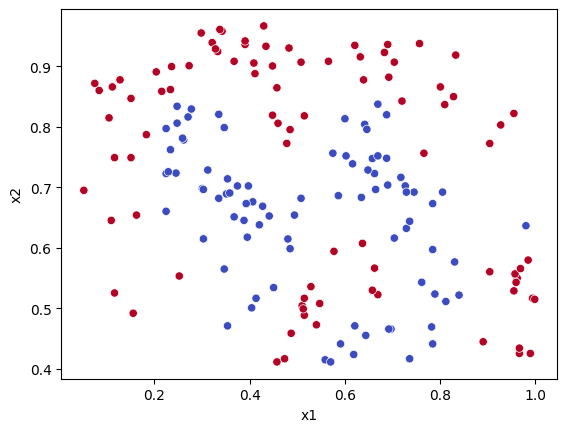

In [51]:
sns.scatterplot(X_test, x='x1', y='x2', c=y_test, cmap="coolwarm")

In [52]:
parameters = {
    "kernel": ['rbf', 'poly'],      # Tipos de kernel a probar
    'C': [1, 10, 50, 100]           # Valores de C a probar
}

gs = GridSearchCV(SVC(probability=True), parameters, cv=5, scoring='accuracy', verbose=2)

gs.fit(X_train, y_train)

print(gs.best_estimator_)  # Mejor modelo encontrado
print(gs.best_params_)     # Mejores hiperparámetros
print(gs.best_score_)      # Mejor score en validación cruzada

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.1s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s
[CV] END ...................................C=10,

In [53]:
final_model = gs.best_estimator_ 
final_model.fit(X_train, y_train)
final_model.score(X_test, y_test)

0.9421965317919075

In [55]:
import pickle 
filename = "final_model.pkl"
# Abrimos el archivo en modo escritura binaria ('wb')
# y guardamos el modelo usando pickle.dump()
with open(filename, "wb") as archivo_salida:
    pickle.dump(final_model, archivo_salida)
    
# Ahora el modelo está guardado y puede usarse más tarde sin re-entrenar

In [56]:
# Abrimos el archivo en modo lectura binaria ('rb')
# y cargamos el modelo usando pickle.load()
with open(filename, 'rb') as archivo_entrada:
    modelo_importado = pickle.load(archivo_entrada)
    
# Ahora podemos usar el modelo sin tener que re-entrenarlo

In [57]:
modelo_importado

,C,100
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
#modelo 2 = modelo_importado.fit(nuevos_datos)

In [58]:
df_eval = pd.DataFrame(X_test, columns=['x1','x2'])
# Agregamos las probabilidades de predicción de clase 1
# Esto nos permite visualizar la confianza del modelo
df_eval['y_pred'] = modelo_importado.predict_proba(X_test)[:,1]

<Axes: xlabel='x1', ylabel='x2'>

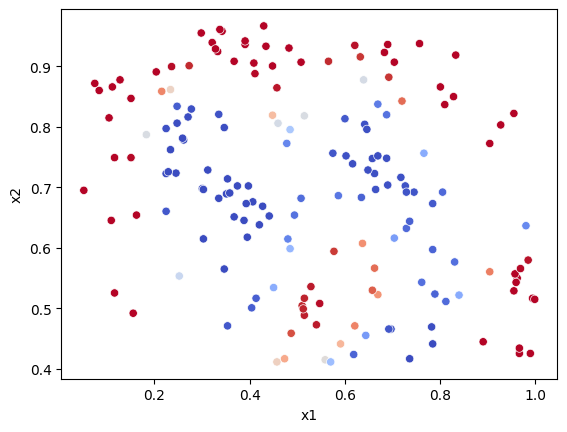

In [59]:
# Visualizamos las predicciones del modelo en el conjunto de test
# Los colores representan la probabilidad de pertenecer a la clase 1
# Rojo (cercano a 1): Alta probabilidad de clase 1
# Azul (cercano a 0): Alta probabilidad de clase 0
sns.scatterplot(df_eval, x='x1', y='x2', c=df_eval['y_pred'], cmap='coolwarm')

In [60]:
# ==========================================
# PIPELINE: FEATURES POLINOMIALES + SVM LINEAL
# ==========================================

# Pipeline permite encadenar transformaciones y modelos
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Creamos un pipeline con dos pasos:
# 1. polynomial: Genera features polinomiales (x1², x2², x1*x2, etc.)
# 2. classifier: SVM Lineal
pipe = Pipeline((
    ('polynomial', PolynomialFeatures()),
    ('classifier', LinearSVC(max_iter=100000))
))

# Definimos hiperparámetros a buscar:
# - polynomial__degree: Grado del polinomio (2, 3, 4, 5)
# - classifier__C: Parámetro de regularización
params_svc = {
    'polynomial__degree': np.arange(2, 6),
    'classifier__C': np.logspace(-1, 2, 5)
}

# GridSearch con el pipeline
# Esto prueba 4 grados × 5 valores de C = 20 combinaciones
# Con cv=5: 20 × 5 = 100 modelos entrenados
gs = GridSearchCV(pipe, params_svc, cv=5, scoring='accuracy', verbose=2)
gs.fit(X_train, y_train)

# Resultados
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

# Evaluamos en test
final_model = gs.best_estimator_
final_model.fit(X_train, y_train)
final_model.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ............classifier__C=0.1, polynomial__degree=2; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=2; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=2; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=2; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=2; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=3; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=3; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=3; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=3; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=3; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=4; total time=   0.0s
[CV] END ............classifier__C=0.1, polynom

0.8323699421965318

In [61]:
# ==========================================
# PIPELINE: FEATURES POLINOMIALES + SVM (con kernel)
# ==========================================

# Creamos otro pipeline, pero esta vez con SVC (que soporta kernels)
pipe = Pipeline((
    ('polynomial', PolynomialFeatures()),
    ('classifier', SVC(max_iter=100000))
))

# Definimos parámetros a buscar:
# - polynomial: None (sin transformación), grado 2 o grado 3
# - classifier__C: Parámetro de regularización
# - classifier__kernel: Tipo de kernel ('linear' o 'rbf')
params_svc = {
    'polynomial': [PolynomialFeatures(2), PolynomialFeatures(3), None],
    'classifier__C': np.logspace(-1, 2, 5),
    'classifier__kernel': ['linear', 'rbf']
}

# GridSearch con el nuevo pipeline
# Esto prueba 3 opciones polynomial × 5 valores C × 2 kernels = 30 combinaciones
# Con cv=5: 30 × 5 = 150 modelos entrenados
gs = GridSearchCV(pipe, params_svc, cv=5, scoring='accuracy', verbose=2)
gs.fit(X_train, y_train)

# Resultados
print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

# Evaluamos en test
final_model = gs.best_estimator_
final_model.fit(X_train, y_train)
final_model.score(X_test, y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END classifier__C=0.1, classifier__kernel=linear, polynomial=PolynomialFeatures(); total time=   0.0s
[CV] END classifier__C=0.1, classifier__kernel=linear, polynomial=PolynomialFeatures(); total time=   0.0s
[CV] END classifier__C=0.1, classifier__kernel=linear, polynomial=PolynomialFeatures(); total time=   0.0s
[CV] END classifier__C=0.1, classifier__kernel=linear, polynomial=PolynomialFeatures(); total time=   0.0s
[CV] END classifier__C=0.1, classifier__kernel=linear, polynomial=PolynomialFeatures(); total time=   0.0s
[CV] END classifier__C=0.1, classifier__kernel=linear, polynomial=PolynomialFeatures(degree=3); total time=   0.0s
[CV] END classifier__C=0.1, classifier__kernel=linear, polynomial=PolynomialFeatures(degree=3); total time=   0.0s
[CV] END classifier__C=0.1, classifier__kernel=linear, polynomial=PolynomialFeatures(degree=3); total time=   0.0s
[CV] END classifier__C=0.1, classifier__kernel=linear, pol

0.9248554913294798